<a href="https://colab.research.google.com/github/LucianoMO101/Pytorch-test/blob/main/Pytorch_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import torch #De Pytorch-bibliotheek zelf
import torch.nn as nn #bevat bouwblokken voor neural networks
                      #(lagen, activatiefuncties, verliesfuncties, enz.).
import torch.nn.functional as F #bevat “functionele” versies van activaties (zoals F.relu)
#die je direct kunt aanroepen zonder een laag-object te maken.

In [37]:
#Create a model class that inherits nn.Module
#nn.Module is de basis-klasse voor alle neurale netwerken in PyTorch.
class Model(nn.Module):
  #Input layer (4 features of a flower) --> Hidden Layer1 (number of neurons)
  #--> H2(n) --> output (3 classes of iris flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
    super().__init__() #instanciate our nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)
    #__init__ maakt de lagen van het netwerk:
    #fc1: eerste “fully connected” laag (4 → 8 neuronen)
    #fc2: tweede laag (8 → 9 neuronen)
    #out: uitvoerlaag (9 → 3 neuronen, één per bloemsoort)


  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

  #Dit beschrijft hoe de data door het netwerk stroomt:
  #self.fc1(x) → vermenigvuldigt invoer met gewichten van laag 1.
  #F.relu(...) → past de ReLU-activatie toe: negatieve waarden worden 0.
  #self.fc2 en F.relu idem voor de tweede laag.
  #self.out → laatste laag zonder activatie (want CrossEntropyLoss doet zelf softmax).


In [38]:
#Pick a manual seed for randomization
#torch.manual_seed(41) zet de willekeurige zaadwaarde vast, zodat resultaten reproduceerbaar zijn.
torch.manual_seed(41)

#Create an instance of model
#Maakt een nieuw netwerk met de standaard-architectuur (4→8→9→3).
model = Model()

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
url = 'https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
my_df = pd.read_csv(url)
#Leest het bekende Iris-dataset in met pandas.

my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [41]:
#Change last column
my_df['variety'] = my_df['variety'].replace('Setosa', 0.0)
my_df['variety'] = my_df['variety'].replace('Versicolor', 1.0)
my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)

#Vervangt de bloemen-namen door numerieke labels (0, 1, 2).
#Neurale netwerken werken met getallen, niet met tekst.
my_df

/tmp/ipython-input-2270476722.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['variety'] = my_df['variety'].replace('Virginica', 2.0)


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [42]:
#Train test Split! X, Y
#Scheidt de invoerkenmerken (X) van de labels (y).
X = my_df.drop('variety', axis=1)
y = my_df['variety']

In [43]:
#Convert these to numpy arrays
X = X.values
y = y.values

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
# Train Test Split
#Verdeelt de data in trainings- en testset (80% / 20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [46]:
#Convert X features to float tensors
#PyTorch-modellen werken met tensors, geen numpy-arrays.
#FloatTensor → voor de invoer (reële waarden).
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [47]:
#Convert y labels to tensors long
#LongTensor → voor de labels (categorie-indexen, nodig voor CrossEntropyLoss).
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [48]:
#Set the criterion of model to measure the error, how far off the predictions are from the data
#Meet hoe goed de voorspellingen overeenkomen met de echte labels.
#Combineert softmax + negative log likelihood → perfect voor classificatie.
criterion = nn.CrossEntropyLoss()

#Choose Adam Optimizer, lr = learning rate (if error doesn't go down after a bunch of iterations (epochs), lower our learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [49]:
#Train our model!
# Epochs? (one run through all the training data in our network)
epochs = 100
losses = []
for i in range(epochs):
  #Go forward and get prediction
  y_pred = model.forward(X_train) #Get predicted results

  #Measure the loss/error, gonna be high at first
  loss = criterion(y_pred, y_train) #predicted value vs y_train value

  #Keep Track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epoch
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  #Do some back propagation: take the error rate of forward propagation
  # and feed it back through the network to fine tune the weights.
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 1.0097211599349976
Epoch: 20 and loss: 0.8162348866462708
Epoch: 30 and loss: 0.585993230342865
Epoch: 40 and loss: 0.4003390073776245
Epoch: 50 and loss: 0.2679471969604492
Epoch: 60 and loss: 0.1796349734067917
Epoch: 70 and loss: 0.12165623158216476
Epoch: 80 and loss: 0.0860651433467865
Epoch: 90 and loss: 0.06522615998983383
Epoch: 100 and loss: 0.05286872386932373
Epoch: 110 and loss: 0.04508009925484657
Epoch: 120 and loss: 0.03979312628507614
Epoch: 130 and loss: 0.03596428409218788
Epoch: 140 and loss: 0.033028002828359604
Epoch: 150 and loss: 0.030512504279613495
Epoch: 160 and loss: 0.027733495458960533
Epoch: 170 and loss: 0.02461206540465355
Epoch: 180 and loss: 0.021672343835234642
Epoch: 190 and loss: 0.019320344552397728


Text(0.5, 0, 'Epoch')

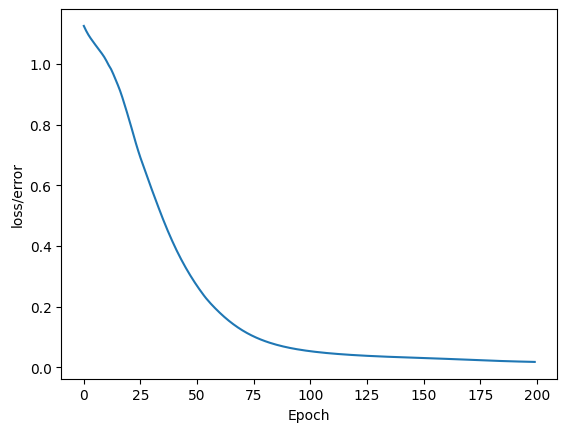

In [50]:
#Graph it out!
plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')